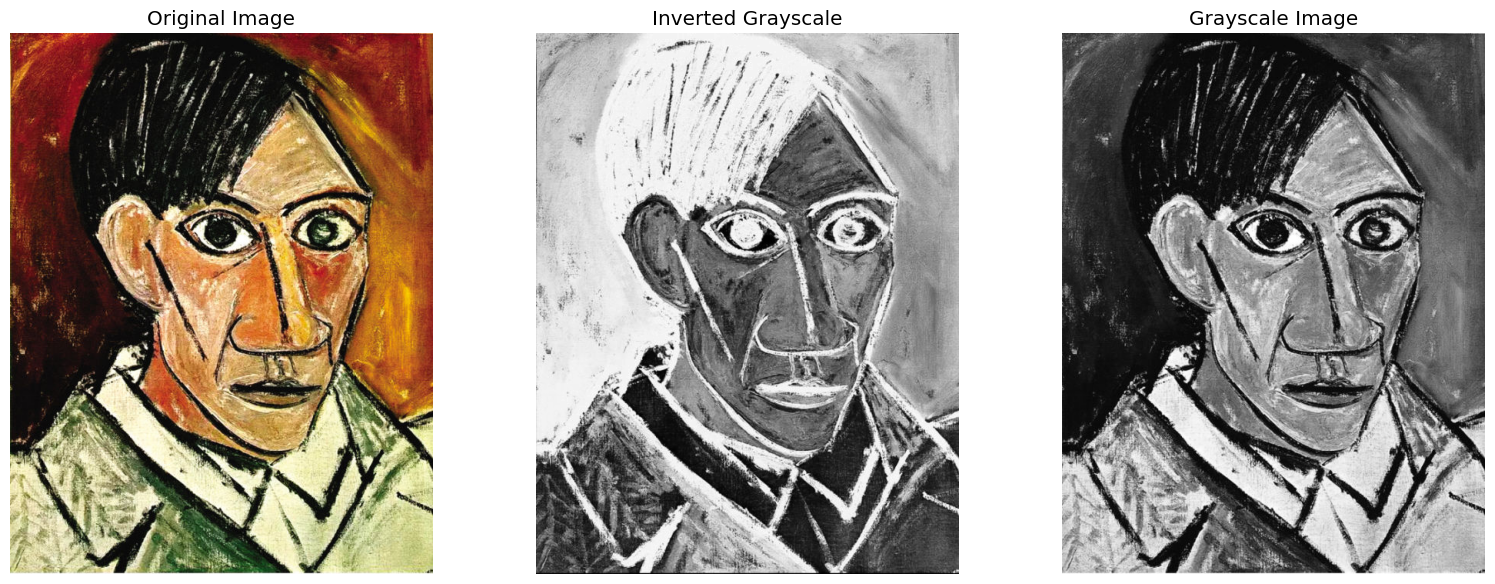

"\nplt.imshow(256-A)\nplt.imshow(A)\nplt.axis('off')\nplt.title('original pic')\n\nplt.figure()\n# plt.imshow(256-A)\nplt.imshow(256-B)\nplt.axis('off')\nplt.title('256-B')\n\nplt.figure()\nplt.imshow(B)\n# plt.imshow(B, cmap='gray')  # 显示灰度图\nplt.axis('off')\nplt.title('B')\n"

In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [16, 6]  # Set the size of the graphic to 4x4 inches
# plt.rcParams['figure.figsize'] = [4, 4]  # Set the size of the graphic to 4x4 inches
plt.rcParams.update({'font.size': 12})

A = imread(os.path.join('pic.jpg'))
# A = imread(os.path.join('shell.jpeg'))
# A = imread(os.path.join('building.jpg'))
# A = imread(os.path.join('scenary.jpg'))

# convert RGB to grayscale,This averages the values of the red, green, and blue channels for each pixel，
# each value represents the brightness (intensity) of that pixels
B = np.mean(A,-1); 
# B = A[:, :, 1]  # 使用绿色通道生成灰度图像

plt.figure()

# Original image
plt.subplot(1, 3, 1)
plt.imshow(A)
plt.axis('off')
plt.title('Original Image')

# Inverted grayscale image
plt.subplot(1, 3, 2)
plt.imshow(256 - B, cmap='gray')  # Display inverted grayscale
plt.axis('off')
plt.title('Inverted Grayscale')

# Grayscale image
plt.subplot(1, 3, 3)
plt.imshow(B, cmap='gray')  # Display grayscale
plt.axis('off')
plt.title('Grayscale Image')

plt.tight_layout()  # Adjust layout
plt.show()  

'''
plt.imshow(256-A)
plt.imshow(A)
plt.axis('off')
plt.title('original pic')

plt.figure()
# plt.imshow(256-A)
plt.imshow(256-B)
plt.axis('off')
plt.title('256-B')

plt.figure()
plt.imshow(B)
# plt.imshow(B, cmap='gray')  # 显示灰度图
plt.axis('off')
plt.title('B')
'''

Text(0.5, 1.0, 'Without Shift zero freq')

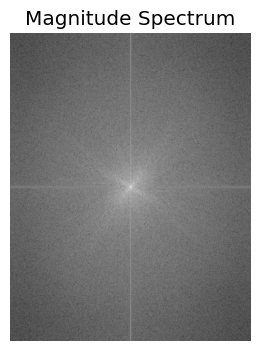

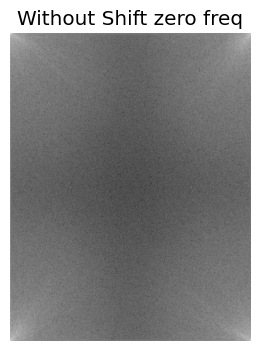

In [2]:
# Display the Frequency Spectrum:
import numpy as np
import matplotlib.pyplot as plt

# Assuming B is your grayscale image from the previous steps
Bt = np.fft.fft2(B)  # Compute the 2D Fourier Transform
Bt_shifted = np.fft.fftshift(Bt)  # Shift zero frequency component to the center

# Compute the magnitude spectrum
# np.abs(Bt_shifted): Takes the magnitude of the complex numbers, which represents the strength of each freq component.
# FT data often contains very large values for low frequencies and very small values for high frequencies. 
# Taking the logarithm helps to normalize these values, so the entire spectrum is visible. 
# The +1 ensures that we don’t take the logarithm of zero.
magnitude_spectrum = np.log(np.abs(Bt_shifted) + 1)  # Add 1 to avoid log(0)

# Display the magnitude spectrum
plt.figure(figsize=(4, 4))
# plt.imshow(magnitude_spectrum)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.title('Magnitude Spectrum')

#################################
# Display the magnitude spectrum without Shift zero freq
magnitude_spectrum = np.log(np.abs(Bt) + 1)  # Add 1 to avoid log(0)
plt.figure(figsize=(4, 4))
# plt.imshow(magnitude_spectrum)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.title('Without Shift zero freq')


The center of the spectrum represents the low frequencies (large-scale variations in the image).
The edges of the spectrum represent high frequencies (fine details or noise in the image).
The brightness of each point corresponds to the magnitude of the frequency component. 
Brighter points indicate stronger frequency components.

How to interpret the spectrum:
Bright spots near the center: These indicate that the image has significant low-frequency content, meaning the image has smooth transitions and large features.

Bright spots far from the center: These indicate high-frequency components, which usually correspond to edges, fine textures, or noise in the image.

Symmetry: The spectrum is usually symmetric around the center because the Fourier transform of real-valued functions (like an image) has symmetric frequency components.

np.floor(...) rounds down the result of the above calculation to ensure that the resulting value is the largest integer that does not exceed the original value. This is because the index must be an integer, not a decimal.

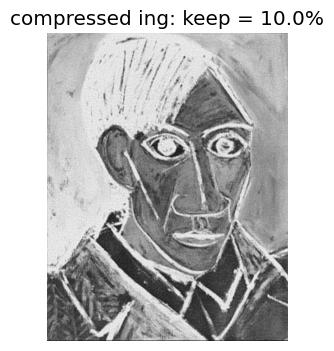

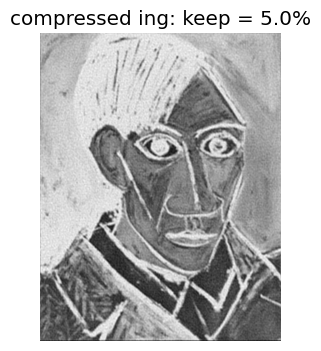

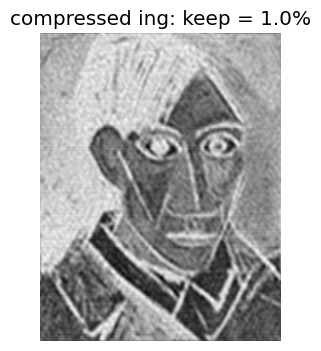

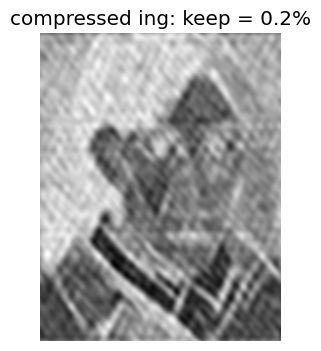

In [3]:
#uses the 2D Fast Fourier Transform (FFT) to compress an image by keeping only the largest coefficients
# converting it from the spatial domain to the frequency domain，
Bt = np.fft.fft2(B) # Bt contains complex numbers representing the frequency components of the image.

plt.rcParams['figure.figsize'] = [4, 4]

# Bt.reshape(-1) flattens the 2D array Bt into a 1D array.
# np.abs(Bt) calculates the magnitude of the complex numbers in Bt.
# np.sort(...) sorts the magnitudes in ascending order. important for thresholding small Fourier coefficients later.
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# zero out all small coefficients and inverse transform
# different keep percentages, mean how much of the total frequency information to retain
# eg. keep = 0.1 means keeping the largest 10% of the Fourier coefficients.
for keep in (0.1, 0.05, 0.01, 0.002):
    # (1 - keep) computes the fraction of the smallest coefficients to zero out.
    # len(Btsort) gives the total number of coefficients. 
    # By multiplying (1 - keep) and using np.floor, we find the index of the threshold value in the sorted list of magnitudes.
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh  # find samll indices, ind=[0 0 0 ... 1 1]
    Atlow = Bt * ind         # keep large coefficients, zero out small ones
    # convert the modified frequency data back into the spatial domain
    # .real extracts the real part of the result, as the ifft may result in small imaginary parts due to numerical precision.
    Alow = np.fft.ifft2(Atlow).real  # compressed img
    plt.figure()
    plt.imshow(256-Alow, cmap='gray')
    plt.axis('off')
    plt.title('compressed ing: keep = '+ str(keep*100) + '%')

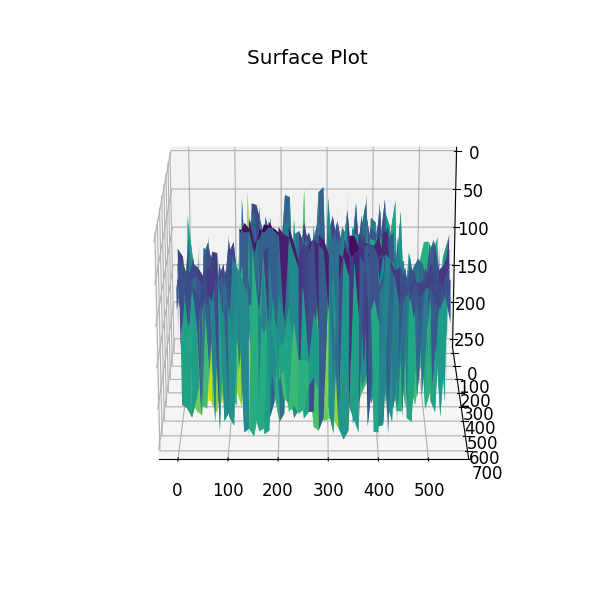

In [4]:
# Allowing for dynamic interactions with the plot
%matplotlib widget  

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(np.arange(1, np.shape(B)[1]+1), np.arange(1, np.shape(B)[0]+1))
ax.plot_surface(X[0::10, 0::10], Y[0::10, 0::10], 256-B[0::10, 0::10], cmap='viridis', edgecolor='none')

ax.set_title('Surface Plot')
ax.mouse_init()
ax.view_init(200, 270)

plt.show()



3D grayscale image: shows the brightness distribution of the image